In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import os
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [58]:
# ticker = "AMAZ"
# file_to_save = 'stock_market_data-%s.csv'%ticker

# if not os.path.exists(file_to_save):
#     url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=%s&outputsize=full&datatype=csv&apikey=SIQLJ1WC7O9759BT'%(ticker)
#     r = requests.get(url)
#     data = r.json()

# print(data)

In [59]:
# api_key = 'SIQLJ1WC7O9759BT'

# ticker = "AMZN"
# url_string = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=%s&outputsize=full&apikey=%s"%(ticker,api_key)


# file_to_save = 'stock_market_data-%s.csv'%ticker

# # If you haven't already saved data,
# # Go ahead and grab the data from the url
# # And store date, low, high, volume, close, open values to a Pandas DataFrame
# if not os.path.exists(file_to_save):
#     with urllib.request.urlopen(url_string) as url:
#         data = json.loads(url.read().decode())
#         # extract stock market data
#         data = data['Time Series (Daily)']
#         df = pd.DataFrame(columns=['Date','Low','High','Close','Open'])
#         for k,v in data.items():
#             date = dt.datetime.strptime(k, '%Y-%m-%d')
#             data_row = [date.date(),float(v['3. low']),float(v['2. high']),
#                         float(v['4. close']),float(v['1. open'])]
#             df.loc[-1,:] = data_row
#             df.index = df.index + 1
#     print('Data saved to : %s'%file_to_save)        
#     df.to_csv(file_to_save)

# # If the data is already there, just load it from the CSV
# else:
#     print('File already exists. Loading data from CSV')
#     df = pd.read_csv(file_to_save)


In [60]:
api_key = 'SIQLJ1WC7O9759BT'

ticker = "AMZN"
url_string = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=%s&outputsize=full&datatype=csv&apikey=%s"%(ticker,api_key)


file_to_save = 'stock_market_data-%s.csv'%ticker

# If you haven't already saved data,
# Go ahead and grab the data from the url
# And store date, low, high, volume, close, open values to a Pandas DataFrame
if not os.path.exists(file_to_save):
    df = pd.read_csv(url_string, parse_dates=['timestamp'],dtype={'open': float, 'high': float, 'low': float, 'close': float, 'volume': float})
    df = df.rename(columns={'timestamp': 'date'})
    # df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
    df.to_csv(file_to_save, index=False)
    print('Data saved to : %s'%file_to_save)

else:
    print('File already exists. Loading data from CSV')
    df = pd.read_csv(file_to_save, dtype={'open': float, 'high': float, 'low': float, 'close': float, 'volume': float})
    df['date'] = pd.to_datetime(df['date'])

File already exists. Loading data from CSV


In [61]:
# stock was split x20 on 2020-06-6
columnsToAdjust = ['open', 'high', 'low', 'close', 'volume']
df.loc[df['date'] < '2022-06-6', columnsToAdjust] /= 20


In [62]:
df = df.sort_values('date')
df.head()

,date,open,high,low,close,volume
6170,1999-11-01,3.4030,3.5940,3.3155,3.4565,641205.0
6169,1999-11-02,3.4875,3.5000,3.2530,3.3220,662160.0
6168,1999-11-03,3.4095,3.4250,3.2500,3.2905,538605.0
6167,1999-11-04,3.3595,3.3595,3.0500,3.1530,837960.0
6166,1999-11-05,3.2375,3.2750,3.1125,3.2470,554570.0


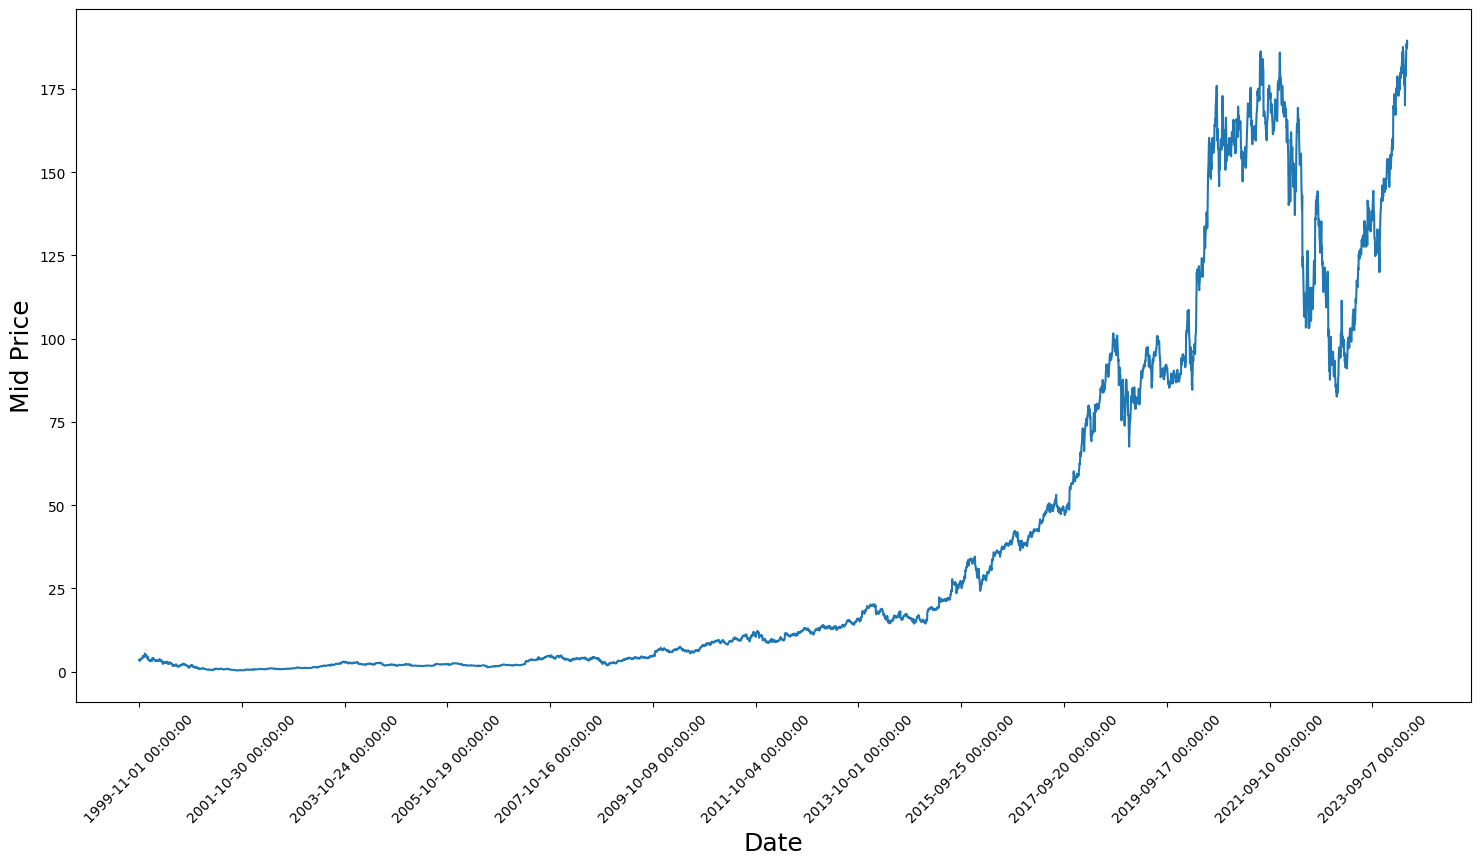

In [63]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),(df['low']+df['high'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [64]:
# split data into training and validation
high_prices = df.loc[:,'high'].to_numpy()
low_prices = df.loc[:,'low'].to_numpy()
mid_prices = (high_prices+low_prices)/2.0

split = 0.85
splitIdx = int(split*len(mid_prices))
trainData = mid_prices[:splitIdx]
testData = mid_prices[splitIdx:]

In [65]:
scaler = MinMaxScaler()
trainData = trainData.reshape(-1,1)
testData = testData.reshape(-1,1)

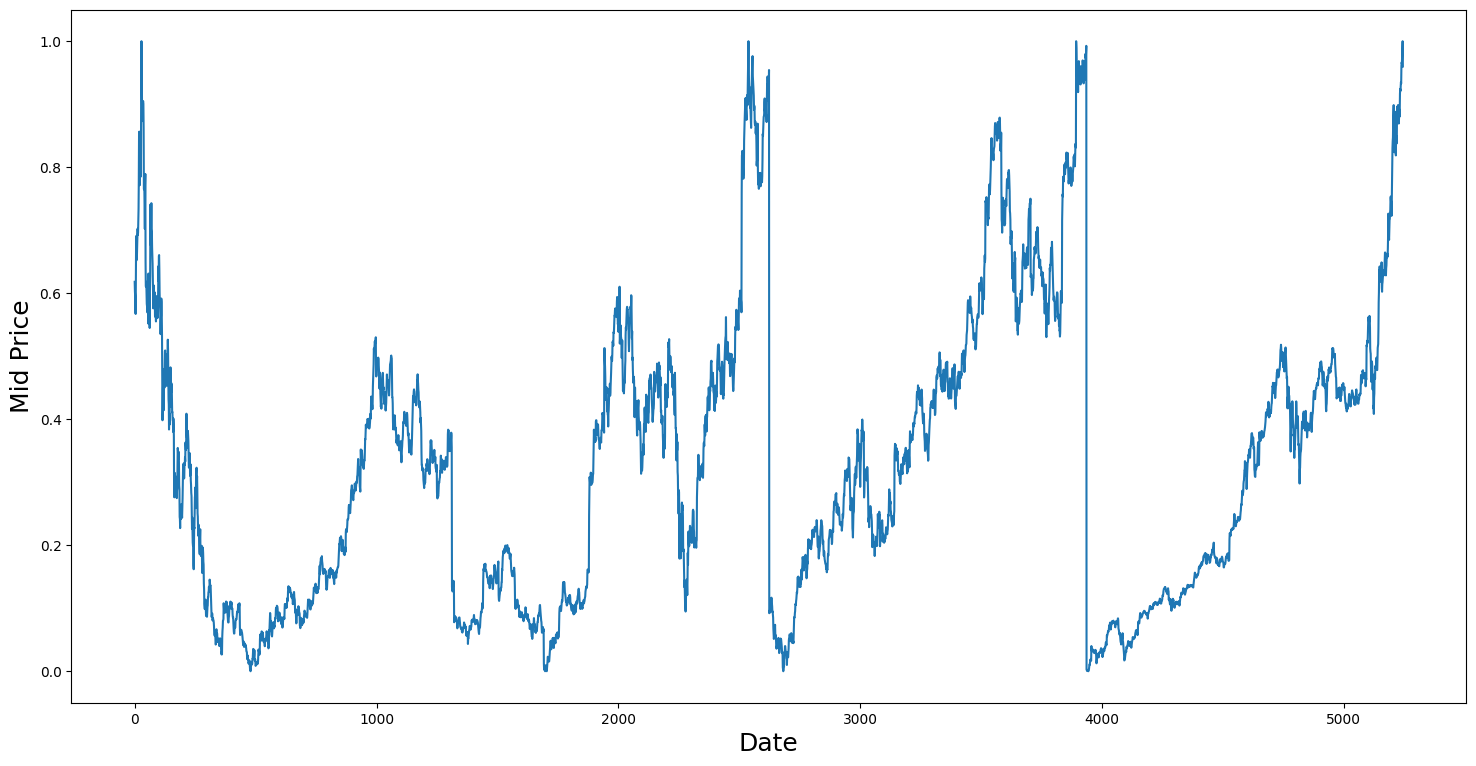

In [67]:
# Train the Scaler with training data and smooth data
smoothing_window_size = int(trainData.size / 4) + 1
for di in range(0,trainData.size ,smoothing_window_size):
    scaler.fit(trainData[di:di+smoothing_window_size,:])
    trainData[di:di+smoothing_window_size,:] = scaler.transform(trainData[di:di+smoothing_window_size,:])

# plt.figure(figsize = (18,9))
# plt.plot(range(trainData.shape),trainData)
# plt.xlabel('Date',fontsize=18)
# plt.ylabel('Mid Price',fontsize=18)
# plt.show()


In [ ]:
trainData = trainData.reshape(-1)

# Normalize test data
testData = scaler.transform(testData).reshape(-1)